In [1]:
import os
from glob import glob
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm 
from IPython.display import Image, display

import warnings
warnings.filterwarnings("ignore")

In [2]:
from cd_plot import draw_cd_diagram

In [3]:
df_list = []

for i, ds in enumerate(["DS1", "DS2", "DS3", "DS4"]):
    #df = pd.read_csv(f"{ds} order by silhouette.csv", index_col=0).reset_index().drop(columns="index")
    df = pd.read_csv(f"{ds} order by norm_mutual_info_score.csv", index_col=0).reset_index().drop(columns="index")
    
    df.dataset = df.dataset.apply(lambda x: f"{x}_{ds}")
    
    df_list.append(df)
    
    print(f"{ds}: {len(df)}")

    
df = pd.concat(df_list).sort_values(by=["dataset", "alg"])


df

DS1: 288
DS2: 88
DS3: 166
DS4: 196


,dataset,alg,n_clusters,max_leaves,base_tree,max_nbr_values,max_nbr_values_cat,time,silhouette,calinski_harabasz,...,metric_cat,max_eps,n_components,oblique_splits,max_oblique_features,min_nr_instances,min_y,min_rd,threshold,branching_factor
0,2d10c_y_DS1,CLTree,NaN,NaN,NaN,NaN,NaN,30.309036,-0.1894,219.8768,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,25.0,NaN,NaN
1,2d10c_y_DS1,CenterParTree2,NaN,NaN,NaN,100.0,20.0,0.785769,0.7120,39804.1055,...,jaccard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2d10c_y_DS1,ExKMC,8.0,8.0,IMM,1000.0,20.0,0.011047,0.8059,33295.5981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2d10c_y_DS1,ImpurityParTree2,NaN,NaN,NaN,1000.0,20.0,5.670538,0.6067,2817.6226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2d10c_y_DS1,PrincipalParTree,NaN,NaN,NaN,inf,20.0,0.051561,0.7652,37058.3001,...,NaN,NaN,1.0,False,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,zelnik6_y_DS1,skl_OPTICS,NaN,NaN,NaN,1000.0,20.0,0.540667,0.5909,203.7951,...,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,zelnik6_y_DS1,skl_agglomerativeClust,4.0,NaN,NaN,1000.0,20.0,0.001207,0.7420,492.4168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,zelnik6_y_DS1,skl_birch,4.0,NaN,NaN,inf,20.0,0.004336,0.7543,576.4192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,50.0
286,zelnik6_y_DS1,skl_bis_kmeans,6.0,NaN,NaN,inf,20.0,0.061384,0.7243,574.0791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
alg_names =  {
    'CLTree': "CLT", 
    'CenterParTree2': "CPT", 
    'ImpurityParTree2': "IPT", 
    'PrincipalParTree': "PPT",
    'VarianceParTree': "VPT", 
    'kmeans+dt': "kMT", 
    'kmodes': "kMd",
    'pyc_xmeans': "xM",
    'skl_DBSCAN': "DBS", 
    'skl_OPTICS': "OPT", 
    'skl_agglomerativeClust': "AHC",
    'skl_birch': "BIR",
    'skl_bis_kmeans': "kM", 
    'skl_kmeans': "bkM",
    'ExKMC': 'ExKMC',
    'ShallowTree': 'ST'
}

df.alg = df.alg.apply(lambda x: alg_names[x])

In [5]:
df.columns.tolist()

['dataset',
 'alg',
 'n_clusters',
 'max_leaves',
 'base_tree',
 'max_nbr_values',
 'max_nbr_values_cat',
 'time',
 'silhouette',
 'calinski_harabasz',
 'davies_bouldin',
 'r_score',
 'adj_rand',
 'mut_info_score',
 'adj_mutual_info_score',
 'norm_mutual_info_score',
 'homog_score',
 'complete_score',
 'v_msr_score',
 'fwlks_mallows_score',
 'init',
 'n_init',
 'max_iter',
 'tol',
 'verbose',
 'random_state',
 'copy',
 'algorithm',
 'bisecting_strategy',
 'labels_as_tree_leaves',
 'criterion',
 'splitter',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'class_weight',
 'ccp_alpha',
 'max_depth',
 'max_nbr_clusters',
 'bic_eps',
 'eps',
 'min_samples',
 'metric',
 'n_jobs',
 'linkage',
 'amount_initial_centers',
 'kmax',
 'criteria_clf',
 'criteria_reg',
 'depth_factor',
 'metric_con',
 'metric_cat',
 'max_eps',
 'n_components',
 'oblique_splits',
 'max_oblique_features',
 'min_nr_instances',
 'min_y

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

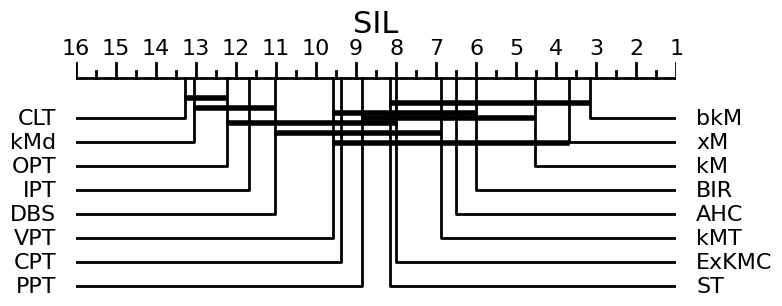

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

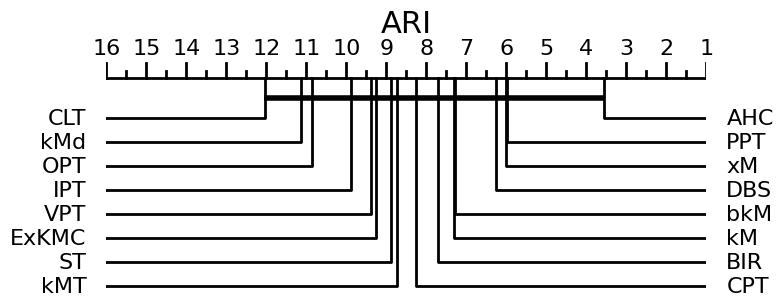

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

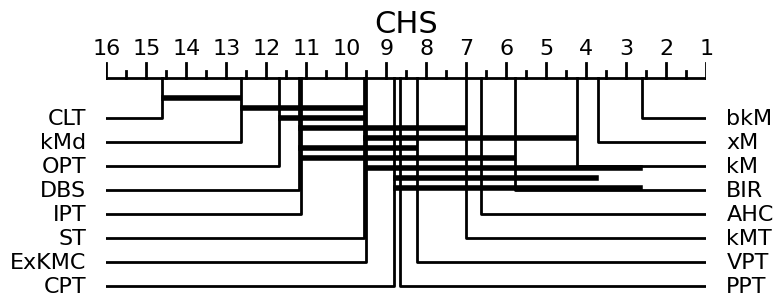

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

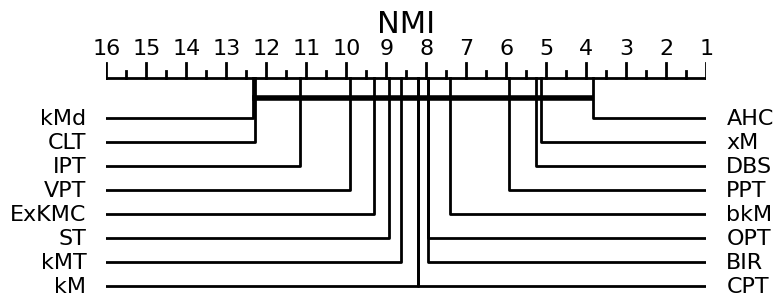

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

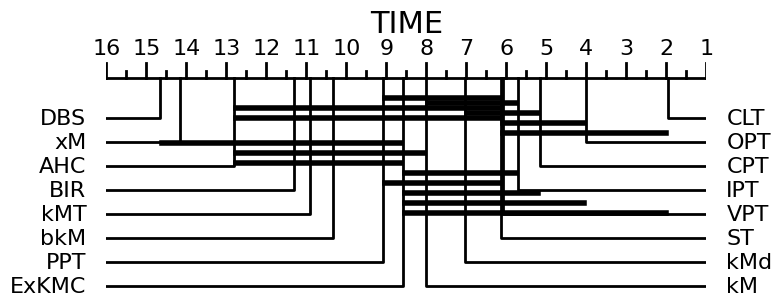

In [6]:
measures = [
    ("silhouette", "SIL"),
    ("r_score", "ARI"),
    ("calinski_harabasz", "CHS"),
    ("norm_mutual_info_score", "NMI"),
    ("time", "TIME"),
]

for measure, display_name in measures:
    rename_dict = {
        "alg": "classifier_name",
        "dataset": "dataset_name",
        measure: "accuracy"
    }

    df_perf = df[["alg", "dataset", measure]].rename(columns=rename_dict)
    
    #df_perf = df_perf[df_perf.dataset_name.isin(df[df.alg=="CLT"].dataset.unique().tolist())]
    
    tmp = []
    
    for alg in df.alg.unique():
        for dataset_name in set(df.dataset.unique().tolist())-set(df_perf[df_perf.classifier_name == alg].dataset_name.unique().tolist()):
            tmp.append((alg, dataset_name, 0 if measure != "time" else 500))
        
    df_perf = pd.concat([df_perf, pd.DataFrame(tmp, columns=df_perf.columns)])

    draw_cd_diagram(df_perf=df_perf, title=display_name, labels=False, alpha=.01);
    
    display(Image(filename="cd-diagram.png"))
    
    os.rename("cd-diagram.png", f"CD_{display_name}_nmi_0.01.png")

In [7]:
df_perf

,classifier_name,dataset_name,accuracy
0,CLT,2d10c_y_DS1,30.309036
1,CPT,2d10c_y_DS1,0.785769
2,ExKMC,2d10c_y_DS1,0.011047
3,IPT,2d10c_y_DS1,5.670538
4,PPT,2d10c_y_DS1,0.051561
...,...,...,...
105,BIR,bank_DS3,500.000000
106,kM,bank_DS4,500.000000
107,kM,bank_DS3,500.000000
108,bkM,bank_DS4,500.000000


In [8]:
df.dataset.unique()

array(['2d10c_y_DS1', '2d20cno0_y_DS1', '2d3cno123_y_DS1', '2d4c_y_DS1',
       '2d4cno9_y_DS1', '2dd31_y_DS1', 'adultONEHOT_y_DS2', 'adult_y_DS3',
       'adult_y_DS4', 'aggregation_y_DS1', 'bank_DS3', 'bank_DS4',
       'churnONEHOT_y_DS2', 'churn_y_DS3', 'churn_y_DS4',
       'compasscorestwoyearsONEHOT_y_DS2', 'compasscorestwoyears_y_DS2',
       'compasscorestwoyears_y_DS4', 'curet02000n2D_y_DS1',
       'curet12000n2D_y_DS1', 'curet24k_y_DS1', 'diabetes_y_DS3',
       'diabetes_y_DS4', 'ficoONEHOT_DS2', 'fico_DS3', 'fico_DS4',
       'german_creditONEHOT_y_DS2', 'german_credit_y_DS3',
       'german_credit_y_DS4', 'home_DS3', 'home_DS4', 'ionosphere_y_DS3',
       'ionosphere_y_DS4', 'iris_y_DS2', 'iris_y_DS3', 'iris_y_DS4',
       'longsquare_y_DS1', 'sset1_y_DS1', 'sset2_y_DS1', 'tetra_y_DS1',
       'titanic_y_DS3', 'titanic_y_DS4', 'triangle1_y_DS1',
       'triangle2_y_DS1', 'vehicle_y_DS3', 'vehicle_y_DS4', 'wdbc_y_DS2',
       'wdbc_y_DS3', 'wdbc_y_DS4', 'wine_DS3', 'wine_

In [9]:
df[df.alg=="CLT"].dataset.unique()

array(['2d10c_y_DS1', '2d20cno0_y_DS1', '2d3cno123_y_DS1', '2d4c_y_DS1',
       '2d4cno9_y_DS1', '2dd31_y_DS1', 'aggregation_y_DS1',
       'compasscorestwoyears_y_DS2', 'compasscorestwoyears_y_DS4',
       'curet02000n2D_y_DS1', 'curet12000n2D_y_DS1', 'curet24k_y_DS1',
       'diabetes_y_DS3', 'diabetes_y_DS4', 'german_credit_y_DS3',
       'german_credit_y_DS4', 'home_DS3', 'home_DS4', 'ionosphere_y_DS3',
       'ionosphere_y_DS4', 'longsquare_y_DS1', 'sset1_y_DS1',
       'sset2_y_DS1', 'tetra_y_DS1', 'titanic_y_DS3', 'titanic_y_DS4',
       'triangle1_y_DS1', 'triangle2_y_DS1', 'vehicle_y_DS3',
       'vehicle_y_DS4', 'zelnik5_y_DS1', 'zelnik6_y_DS1'], dtype=object)

In [10]:
df.groupby(["alg", "dataset"])[["silhouette"]].count()

silhouette
alg dataset                    
AHC 2d10c_y_DS1               1
    2d20cno0_y_DS1            1
    2d3cno123_y_DS1           1
    2d4c_y_DS1                1
    2d4cno9_y_DS1             1
...                         ...
xM  wdbc_y_DS4                1
    wine_DS3                  1
    wine_DS4                  1
    zelnik5_y_DS1             1
    zelnik6_y_DS1             1

[738 rows x 1 columns]

# Test con Orange==3.30

In [ ]:
!pip install orange3==3.26

In [12]:
import os
from glob import glob
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm 
from IPython.display import Image, display

import warnings
warnings.filterwarnings("ignore")

In [13]:
df_list = []

for i, ds in enumerate(["DS1", "DS2", "DS3", "DS4"]):
    #df = pd.read_csv(f"{ds} order by silhouette.csv", index_col=0).reset_index().drop(columns="index")
    df = pd.read_excel(f"{ds} order by silhouette.xlsx", header=[0,1], index_col=0).reset_index()

    df.columns = map(lambda x: f"{x[0]}_{x[1]}", df.columns.tolist())
    
    #df.dataset = df.dataset.apply(lambda x: f"{x}_{ds}")
    
    df_list.append(df)
    
    print(f"{ds}: {len(df)}")

    
df = pd.concat(df_list)


df.head()

DS1: 16
DS2: 16
DS3: 14
DS4: 16


,alg_,adj_mutual_info_score_count,adj_mutual_info_score_max,adj_mutual_info_score_mean,adj_mutual_info_score_min,adj_mutual_info_score_rank_mean,adj_mutual_info_score_std,adj_mutual_info_score_win,adj_rand_count,adj_rand_max,...,time_rank_mean,time_std,time_win,v_msr_score_count,v_msr_score_max,v_msr_score_mean,v_msr_score_min,v_msr_score_rank_mean,v_msr_score_std,v_msr_score_win
0,CenterParTree2,18,1.0000,0.800444,0.5182,6.722222,0.146774,2,18,1.0000,...,13.000000,2.102938,0,18,1.0000,0.801633,0.5193,6.722222,0.146278,2
1,ImpurityParTree2,18,0.8924,0.478939,0.0003,12.777778,0.325970,0,18,0.8902,...,12.388889,4.135849,0,18,0.8929,0.481356,0.0041,12.777778,0.325082,0
2,PrincipalParTree,18,1.0000,0.771222,0.3855,7.888889,0.168401,1,18,1.0000,...,6.444444,0.045844,0,18,1.0000,0.773033,0.3878,7.888889,0.168079,1
3,VarianceParTree,18,0.9041,0.653528,0.4453,9.833333,0.136274,0,18,0.8585,...,12.833333,1.022695,0,18,0.9047,0.655094,0.4469,9.833333,0.135942,0
4,CLTree,18,0.4409,0.101361,0.0000,15.000000,0.134510,0,18,0.2271,...,15.944444,37.083187,0,18,0.4417,0.103067,0.0000,15.222222,0.135788,0


In [14]:
import Orange
from Orange.evaluation import compute_CD

ModuleNotFoundError: No module named 'Orange'

In [13]:
df.groupby("alg_")["norm_mutual_info_score_rank_mean"].mean()

alg_
CLTree                    6.787698
CenterParTree2            4.517170
ImpurityParTree2          7.029762
PrincipalParTree          3.974206
VarianceParTree           6.583333
kmeans+dt                 6.482143
kmodes                    8.809066
pyc_xmeans                4.886294
skl_DBSCAN                7.065629
skl_OPTICS                6.321429
skl_agglomerativeClust    6.167125
skl_birch                 5.807998
skl_bis_kmeans            4.824939
skl_kmeans                4.330281
Name: norm_mutual_info_score_rank_mean, dtype: float64

In [14]:
alg_names =  {
    'CLTree': "CLT", 
    'CenterParTree2': "CPT", 
    'ImpurityParTree2': "IPT", 
    'PrincipalParTree': "PPT",
    'VarianceParTree': "VPT", 
    'kmeans+dt': "kMT", 
    'kmodes': "kMd",
    'pyc_xmeans': "xM",
    'skl_DBSCAN': "DBS", 
    'skl_OPTICS': "OPT", 
    'skl_agglomerativeClust': "AHC",
    'skl_birch': "BIR",
    'skl_bis_kmeans': "kM", 
    'skl_kmeans': "bkM",
}

df.alg_ = df.alg_.apply(lambda x: alg_names[x])

fwlks_mallows_score -> fms

wilcoxon_holm

SIL:   0%|          | 0/1 [00:00<?, ?it/s]

ARI:   0%|          | 0/1 [00:00<?, ?it/s]

FMS:   0%|          | 0/1 [00:00<?, ?it/s]

NMI:   0%|          | 0/1 [00:00<?, ?it/s]

TIME:   0%|          | 0/1 [00:00<?, ?it/s]

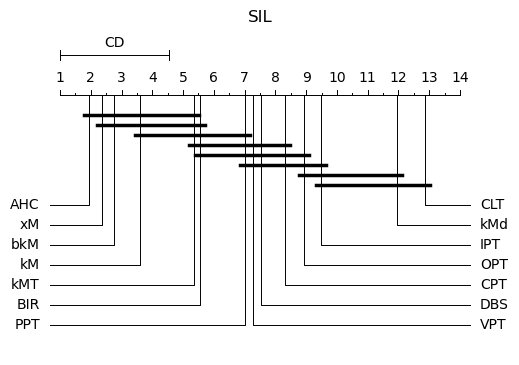

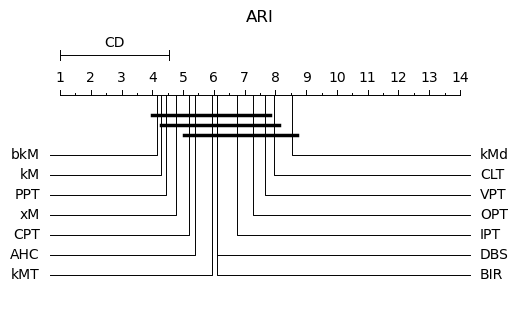

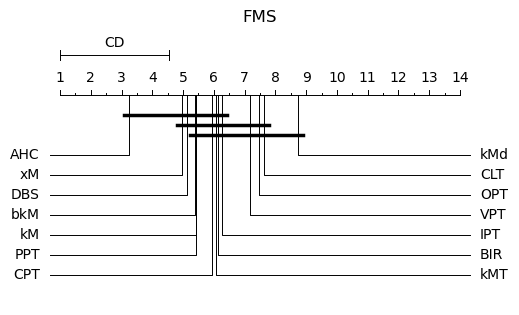

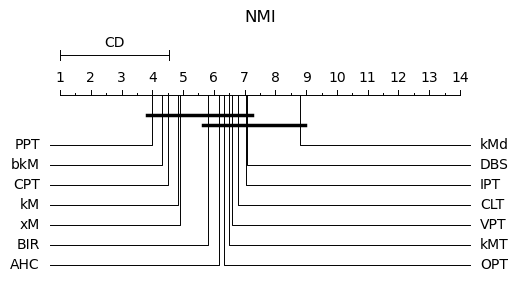

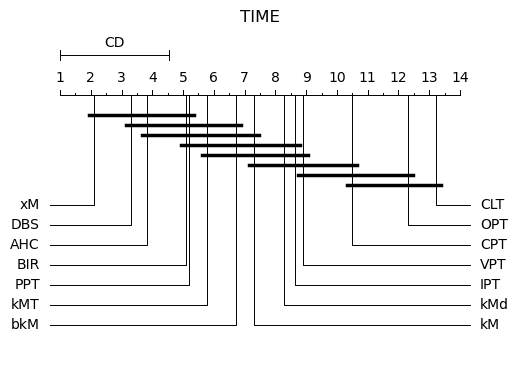

In [22]:
measures = [
    ("silhouette", "SIL"),
    ("r_score", "ARI"),
    ("fwlks_mallows_score", "FMS"),
    ("norm_mutual_info_score", "NMI"),
    ("time", "TIME"),
]

for measure, measure_display in measures:
    for alpha in tqdm([0.001], desc=measure_display):
        cd = compute_CD(df.groupby("alg_")[f"{measure}_rank_mean"].mean(), 53, test="nemenyi", alpha=alpha)
        Orange.evaluation.graph_ranks(df.groupby("alg_")[f"{measure}_rank_mean"].mean(), \
                                              df.groupby("alg_")[f"{measure}_rank_mean"].mean().index, \
                                              cd=cd, \
                                              width=5, textspace=0.5)
        plt.title(measure_display)
        plt.savefig('cd/cd_orange_test.png', format='png', bbox_inches='tight', dpi=300)
        #display(Image(filename="cd_orange_test.png"))
        os.rename("cd/cd_orange_test.png", f"cd/CD_{measure_display}_sil_{alpha}.png")